In [ ]:
using Pkg; Pkg.add("https://github.com/baggepinnen/ControlSystemIdentification.jl"); Pkg.add("Plots")

In this notebook, we will explore impulse-response estimation using [ControlSystemIdentification.jl](https://github.com/baggepinnen/ControlSystemIdentification.jl)
Before any identification can begin, we need to load all the relevant packages.

In [28]:
using ControlSystemIdentification, ControlSystems, Plots
using Random, LinearAlgebra
default(size=(500,280))

We start by creating a system to use as the subject of identification and some data to use for identification

In [42]:
T = 200
h = 1   # This is the sample time
t = h:h:T
sim(sys,u) = lsim(sys, u, t)[1][:]
sys = c2d(tf(1,[1,2*0.1,0.1]),h)

u  = randn(length(t))
y  = sim(sys, u);

The main functionality is in the function `impulseest`, and it's corresponding plot function `impulseestplot`. Estimation is done by fitting a high-order FIR model on the form
$$y_k = \sum_{j=1}^{n} b_j u_{k-j}$$
which when $n \rightarrow \infty$ can approximate any rational transfer function [(ref: Taylor series of rational function, Wikipedia)](https://en.wikipedia.org/wiki/Rational_function#Taylor_series)

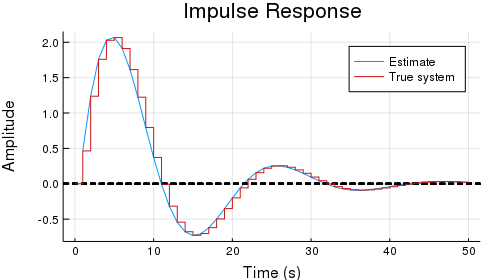

In [43]:
impulseestplot(h,y,u,50, lab="Estimate")
impulseplot!(sys,50, lab="True system")

That worked very well, but our data did not have any noise at all :/ If we add some noise, things will look a bit worse, but you get the deal

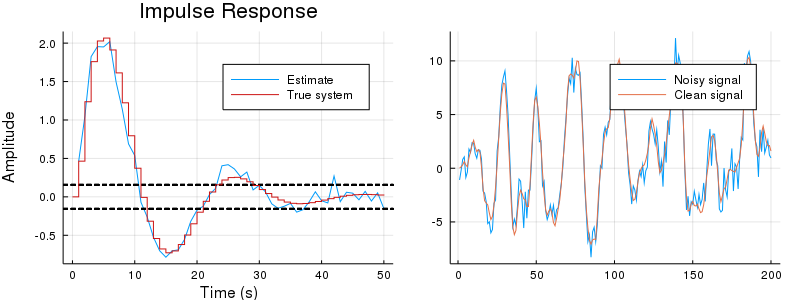

In [47]:
yn = y + 1randn(size(y))
p1 = impulseestplot(h,yn,u,50, lab="Estimate")
impulseplot!(sys,50, lab="True system")
p2 = plot([yn y], lab=["Noisy signal" "Clean signal"])
plot(p1,p2, size=(800,300))

Not too bad! The black dashed lines around zero indicate the 95% confidence bounds for the impulse-response coefficients.

Actually, let's hit it with a lot of noise just to see what happens

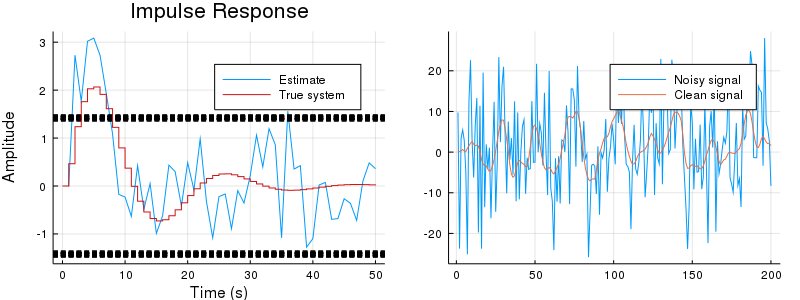

In [48]:
yn = y + 10randn(size(y))
p1 = impulseestplot(h,yn,u,50, lab="Estimate")
impulseplot!(sys,50, lab="True system")
p2 = plot([yn y], lab=["Noisy signal" "Clean signal"])
plot(p1,p2, size=(800,300))

Yeah that sucks, but what did you expect? Does it at least get better with more data?

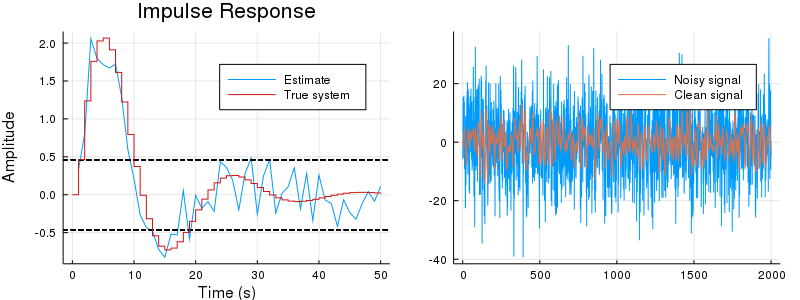

In [49]:
T = 2000
h = 1   # This is the sample time
t = h:h:T

u  = randn(length(t))
y  = sim(sys, u);
yn = y + 10randn(size(y))
p1 = impulseestplot(h,yn,u,50, lab="Estimate")
impulseplot!(sys,50, lab="True system")
p2 = plot([yn y], lab=["Noisy signal" "Clean signal"])
plot(p1,p2, size=(800,300))

It did